In [2]:
from datetime import datetime as dt

BBOXES = {
    'central': [29.242740, -0.807347, 29.629208, -0.591585],
    'south':  [29.296298, -1.582263, 29.769293, -1.197520],
}

JOBS = [
    (dt(2020, 1, 1),  dt(2020, 3, 1),  'south', 40),
    (dt(2020, 4, 1),  dt(2020, 6, 1),  'south', 30),
    (dt(2020, 7, 1),  dt(2020, 9, 1),  'south', 15),
    (dt(2020, 10, 1), dt(2020, 12, 1), 'south', 20),
    
    (dt(2021, 1, 1),  dt(2021, 3, 1), 'south',  30),
    (dt(2021, 4, 1),  dt(2021, 6, 1), 'south',  30),
    (dt(2021, 7, 1),  dt(2021, 9, 1), 'south',  15),
    (dt(2021, 10, 1), dt(2021, 12, 1), 'south', 20),
    
    (dt(2022, 1, 1),  dt(2022, 3, 1), 'south',  20),
    (dt(2022, 4, 1),  dt(2022, 6, 1), 'south',  30),
    (dt(2022, 7, 1),  dt(2022, 9, 1), 'south',   5),
    (dt(2022, 10, 1), dt(2022, 12, 1), 'south', 30),
    
    (dt(2020, 1, 1),  dt(2020, 3, 1),  'central', 20),
    (dt(2020, 4, 1),  dt(2020, 6, 1),  'central', 20),
    (dt(2020, 7, 1),  dt(2020, 9, 1),  'central', 20),
    (dt(2020, 10, 1), dt(2020, 12, 1), 'central', 20),

    (dt(2021, 1, 1),  dt(2021, 3, 1), 'central',  20),
    (dt(2021, 4, 1),  dt(2021, 6, 1), 'central',  30),
    (dt(2021, 7, 1),  dt(2021, 9, 1), 'central',  20),
    (dt(2021, 10, 1), dt(2021, 12, 1), 'central', 20),

    (dt(2022, 1, 1),  dt(2022, 3, 1), 'central',  30),
    (dt(2022, 4, 1),  dt(2022, 6, 1), 'central',  20),
    (dt(2022, 7, 1),  dt(2022, 9, 1), 'central',  15),
    (dt(2022, 10, 1), dt(2022, 12, 1), 'central', 30),
]


## Initialize collections 📂

Try to make sure grid square has at least 2-3 images per 

In [8]:
%reload_ext autoreload
%autoreload 2

import os
from pystac import ItemCollection

import common.utilities.download as download


job_params = []
for job in JOBS:
    start_date, end_date, region, max_cloud_cover = job[0], job[1], job[2], job[3]
    bbox = BBOXES[region]

    sub_dir =  start_date.strftime("%Y%m%d") + "_" + end_date.strftime("%Y%m%d") + "_" + region
    print(sub_dir)
    
    collection_path = f'./data/{sub_dir}/s2_collection.json'
    
    if not os.path.exists(collection_path):
        collection = download.get_collection(start_date, end_date, bbox, collection_path, max_cloud_cover=max_cloud_cover, min_tile_count=2)
    else:
        collection = ItemCollection.from_file(collection_path)

    job_params.append({
        'collection': collection,
        'sub_dir': sub_dir,
        'bbox': bbox
    })
    

20200101_20200301_south
./data/20200101_20200301_south/s2_collection.json: {'RU': 3, 'QU': 3}
20200401_20200601_south
./data/20200401_20200601_south/s2_collection.json: {'RU': 2, 'QU': 2}
20200701_20200901_south
./data/20200701_20200901_south/s2_collection.json: {'QU': 2, 'RU': 5}
20201001_20201201_south
./data/20201001_20201201_south/s2_collection.json: {'QU': 3, 'RU': 3}
20210101_20210301_south
./data/20210101_20210301_south/s2_collection.json: {'RU': 2, 'QU': 2}
20210401_20210601_south
./data/20210401_20210601_south/s2_collection.json: {'QU': 3, 'RU': 3}
20210701_20210901_south
./data/20210701_20210901_south/s2_collection.json: {'RU': 6, 'QU': 2}
20211001_20211201_south
./data/20211001_20211201_south/s2_collection.json: {'QU': 3, 'RU': 2}
20220101_20220301_south
./data/20220101_20220301_south/s2_collection.json: {'RU': 6, 'QU': 2}
20220401_20220601_south
./data/20220401_20220601_south/s2_collection.json: {'RU': 4, 'QU': 3}
20220701_20220901_south
./data/20220701_20220901_south/s2_co

In [15]:
%reload_ext autoreload
%autoreload 2


import common.utilities.download as download
import common.utilities.imagery as imagery


for params in job_params:
    bbox = params['bbox']
    sub_dir = params['sub_dir']
    collection = params['collection']
    
    print(sub_dir)
    
    composite_path = download.get_processed_composite(collection, bbox, f'./data/{sub_dir}')
    
    rgb_path = f'./data/{sub_dir}/rgb_byte.tif'
    imagery.create_rgb_byte_tif_from_composite(composite_path, rgb_path)


20200101_20200301_south
	downloading... S2B_35MRU_20200207_0_L2A
	downloading... S2B_35MQU_20200207_0_L2A
	downloading... S2A_35MRU_20200212_0_L2A
	downloading... S2B_35MQU_20200217_0_L2A
	downloading... S2A_35MQU_20200212_0_L2A
	downloading... S2B_35MRU_20200217_0_L2A
	masking and normalizing... S2B_35MRU_20200207_0_L2A


/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


	masking and normalizing... S2B_35MQU_20200207_0_L2A
	masking and normalizing... S2A_35MRU_20200212_0_L2A
	masking and normalizing... S2B_35MQU_20200217_0_L2A
	masking and normalizing... S2A_35MQU_20200212_0_L2A
	masking and normalizing... S2B_35MRU_20200217_0_L2A
	compositing...
20200401_20200601_south
	downloading... S2B_35MRU_20200407_0_L2A
	downloading... S2B_35MRU_20200527_0_L2A
	downloading... S2B_35MQU_20200527_0_L2A
	downloading... S2B_35MQU_20200407_0_L2A
	masking and normalizing... S2B_35MRU_20200407_0_L2A
	masking and normalizing... S2B_35MRU_20200527_0_L2A
	masking and normalizing... S2B_35MQU_20200527_0_L2A
	masking and normalizing... S2B_35MQU_20200407_0_L2A
	compositing...
20200701_20200901_south
	downloading... S2A_35MQU_20200820_0_L2A
	downloading... S2A_35MRU_20200820_0_L2A
	downloading... S2B_35MRU_20200726_0_L2A
	downloading... S2B_35MRU_20200805_0_L2A
	downloading... S2A_35MRU_20200731_0_L2A
	downloading... S2A_35MQU_20200731_0_L2A
	downloading... S2A_35MRU_2020072

In [14]:
%%bash

# gdalinfo ./data/20200101_20200301_south/S2A_35MQU_20200212_0_L2A/stack.tif
# gdalinfo -stats ./data/20200101_20200301_south/composite.tif

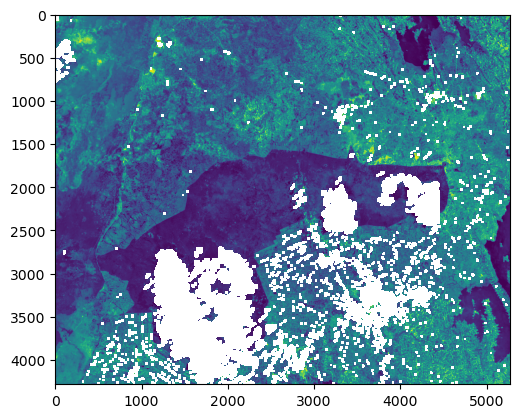

In [16]:
import matplotlib.pyplot as plt
import rasterio

with rasterio.open("./data/20220701_20220901_south/composite.tif") as src:
    data = src.read(3, masked=True)
    plt.imshow(data)

(4, 4283, 5265)


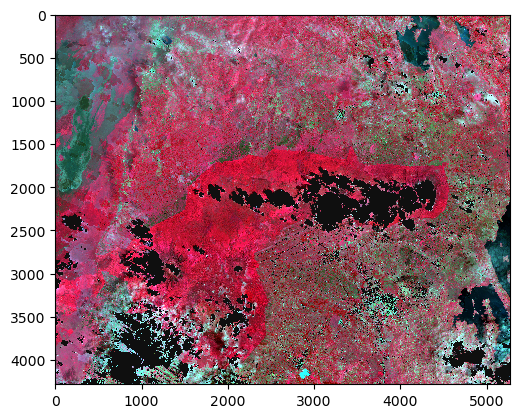

In [13]:
import rasterio

import common.utilities.visualization as viz

tif_path = "./data/20200101_20200301_south/composite.tif"
with rasterio.open(tif_path) as src:
    data = src.read(masked=True)
    
viz.plot_bands(data, bands=[3, 2, 1], transpose=True)